In [1]:
img_path = '/home/tli_project/Desktop/Data/T4/neurons/seg_1_211104_P36_N1_GFP.tif'
stab_path = '/home/tli_project/Desktop/Data/T4/neurons/output/stable_seg_1_211104_P36_N1_GFP.tif'

In [2]:
import matplotlib.pyplot as plt
import tifffile as tif
import numpy as np
import utils.analysis as analysis

In [3]:
img_all = tif.imread(img_path)
img_stab = tif.imread(stab_path)

In [4]:
img_all[img_all!=0] = 1
img_stab[img_stab!=0] = 1 

In [5]:
img_all.shape

(89, 54, 400, 400)

In [28]:
arr = np.array([[1,2,3],[4,0,6]])

In [33]:
np.argwhere(arr<2)   

array([[0, 0],
       [1, 1]])

In [38]:
list(el for el in test[0])

[0, 0]

In [44]:
for i in test:
    ind = list(el for el in i)
    print(i, ind)
    el = 
    print(arr[el for el in i])

SyntaxError: invalid syntax (496947931.py, line 4)

In [40]:
ind

[1, 1]

In [50]:
l = [1,1]
arr[(i for i in l)]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [22]:
np.where((arr<2) & (arr>0))

(array([0]), array([0]))

In [45]:
# converting 4D image to pointcloud and back to 4D image 
T, Z, Y, X = np.where(img_all == 1)
val = np.array(list(zip(T,Z,Y,X)))
test2 = np.empty_like(img_all)
for px in val:
    t,z,y,x = px[0],px[1],px[2],px[3]
    test2[t,z,y,x] = 1

(test2 == img_all).all()
# tif.imsave('test5.tif', test2, imagej=True)

True

In [46]:
lifetimes1 = analysis.px_lifetimes(img_all)

In [47]:
type(lifetimes1), lifetimes1.shape

(numpy.ndarray, (3102012, 5))

In [48]:
lifetimes1[1:3]

array([[ 11,   0, 186, 125,   1],
       [ 11,   0, 187, 123,   1]])

In [49]:
# sanity check for lifetimes
# if taking all pixels with all lifetimes, the resulting image should equal the input img 
test = np.empty_like(img_all)
st_limit = 1
for px in lifetimes1:
    z, y, x = px[1], px[2], px[3]
    for i in np.arange(px[-1]-st_limit,-1,-1):
        t = px[0] - i
        test[t,z,y,x] = 1 

(test == img_all).all()

True

In [6]:
stable_img = analysis.stable_branch(img_all, 
                                    stab_limit=4, 
                                    save=True, 
                                    save_path='', 
                                    save_file='test_slow.tif', 
                                    xy_pixel=0.076, 
                                    z_pixel=0.4)

In [54]:
stable_img1 = analysis.stable_px(img_all, 
                                st_limit = 4, 
                                save=True, 
                                save_path='', 
                                save_file='test_final.tif', 
                                xy_pixel=0.076, 
                                z_pixel=0.4)

In [55]:
(img_stab[4:] == stable_img1[4:]).all()

True

In [5]:
lifetimes1 = analysis.px_lifetimes(img_all)

In [6]:
# sanity check for lifetimes
# if taking all pixels with all lifetimes, the resulting image should equal the input img 
test = np.empty_like(img_all)
st_limit = 1
for px in lifetimes1:
    z, y, x = px[1], px[2], px[3]
    for i in np.arange(px[-1]-st_limit,-1,-1):
        t = px[0] - i
        test[t,z,y,x] = 1 

(test == img_all).all()

True

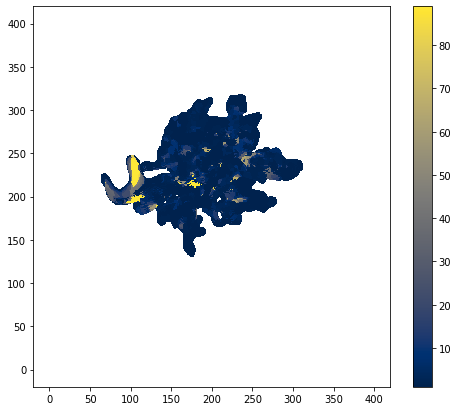

In [72]:
test = lifetimes1[lifetimes1[:,0] == 88]
# test = lifetimes1[lifetimes1[:,-1] > 3]
# test = test[test]
x, y = test[:,3], test[:,2]
color = test[:,-1]
cm = plt.cm.get_cmap('cividis')


fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('auto')
fig.set_size_inches(8,7)


# Create cubic bounding box to simulate equal aspect ratio
max_range = 400
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(400)
# Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(400)
# Comment or uncomment following both lines to test the fake bounding box:
# ax.plot(Xb, Xb, 'w')
for xb, yb in zip(Xb, Xb):
    ax.plot([xb], [xb], 'w')
# ax.scatter(400,400,'w')
sc = ax.scatter(x,y, s=0.5,
                cmap=cm,
                c=color,
                linewidth=0, 
                antialiased=False)
plt.colorbar(sc)

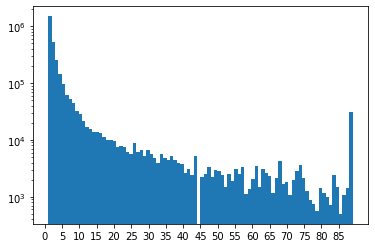

In [77]:
plt.hist(lifetimes1[:,-1], bins=90)
plt.yscale('log')
plt.xticks(range(0,90,5))
plt.show()

In [56]:
lifetimes1 = analysis.px_lifetimes(stable_img1)

In [57]:
test1 = lifetimes1[lifetimes1[:,0] == 88]
test = np.empty_like(stable_img1)
st_limit = 1
for px in test1:
    z, y, x = px[1], px[2], px[3]
    for i in np.arange(px[-1]-st_limit,-1,-1):
        t = px[0] - i
        test[t,z,y,x] = 1 

tif.imwrite('test_12.tif', test, 
            imagej=True, 
            resolution=(1./1, 1./1),
            metadata={'spacing': 1, 
                      'unit': 'um', 
                      'finterval': 1/10,
                      'axes': 'TZYX'})

In [7]:
Z, Y, X = np.where(img_all[0] > -1)
points = np.array(list(zip(Z,Y,X)))
lifetimes = []
for px in points:
    px_life = img_all[:,px[0],px[1],px[2]]
    if px_life.sum() > 0:
        px_high = np.where(px_life == 1)[0]
        if len(px_high) == 1:
            px_coor = [px_high[0], px[0],px[1],px[2], 1]
            lifetimes.append(px_coor)
        else:
            life = 1
            for i, t in enumerate(px_high[1:]):
                if t - px_high[i] == 1:
                    life += 1
                else:
                    px_coor = [px_high[i], px[0],px[1],px[2],life]
                    lifetimes.append(px_coor)
                    life = 1
            # if life > 1:
            px_coor = [px_high[-1], px[0],px[1],px[2],life]
            lifetimes.append(px_coor)

In [113]:
# lifetimes = np.array(lifetimes)
unique_rows = np.unique(lifetimes, axis=0)
len(unique_rows), len(lifetimes)
# len(np.unique(lifetimes), axis=)

In [115]:
lifetimes1 = []
for z in range(img_all[0].shape[0]):
    for y in range(img_all[0].shape[1]):
        for x in range(img_all[0].shape[2]):
            px = img_all[:,z,y,x]
            if px.sum() > 0:
                iter = np.where(px == 1)[0]
                # lifetimes.append([(z,y,x),px,iter])
                life = 1
                if len(iter) == 1:
                    lifetimes1.append([iter[0],z,y,x,1])
                else:
                    for i, t in enumerate(iter[1:]):
                        if t - iter[i] == 1:
                            life += 1
                        elif t - iter[i] > 1:
                            lifetimes1.append([iter[i],z,y,x,life])
                            life = 1
                    # if life > 1:
                    lifetimes1.append([iter[-1],z,y,x,life])

In [8]:
lifetimes = np.array(lifetimes)
# lifetimes1 = np.array(lifetimes1)
(lifetimes == lifetimes1).all()
# np.where(lifetimes[100:125] != lifetimes1[100:125])

True

In [130]:
all_px = lifetimes[lifetimes[:,-1]>0]
len(all_px), len(lifetimes)

(3102012, 3102012)

In [131]:
stable_px = lifetimes[lifetimes[:,-1]>3]
len(stable_px), len(lifetimes)

(840725, 3102012)

In [132]:
len(stable_px) / len(lifetimes)

0.2710257084756603

In [154]:
# lifetimes to pointcloud and 4D image
# px_PC = []
st_limit = 4
stable_px = lifetimes[lifetimes[:,-1]>st_limit-1]
stable_img = np.empty_like(img_all)
for px in stable_px:
    z, y, x = px[1], px[2], px[3]
    for i in np.arange(px[-1]-st_limit,-1,-1):
        t = px[0] - i
        stable_img[t,z,y,x] = 1
        # px_PC.append([t,z,y,x])

tif.imsave('test_stable3.tif', stable_img, imagej=True)

In [152]:
# lifetimes to pointcloud
px_PC = []
st_limit = 1
test2 = np.empty_like(img_all)
for px in all_px:
    z, y, x = px[1], px[2], px[3]
    for i in np.arange(px[-1]-st_limit,-1,-1):
    # for i in np.arange(stable_limit, px[-1]):
        t = px[0] - i
        px_PC.append([t,z,y,x])
        test2[t,z,y,x] = 1

# pointcloud to  4D image
# test2 = np.empty_like(img_all)
# for px in px_PC:
#     t,z,y,x = px[0],px[1],px[2],px[3]
#     test2[t,z,y,x] = 1

# tif.imsave('test_all_2.tif', test2, imagej=True)

In [153]:
(test2 == img_all).all()

True

In [151]:
np.arange(6-1,-1,-1)

array([5, 4, 3, 2, 1, 0])

In [128]:
# converting 4D image to pointcloud and back to 4D image 
stable_img = np.empty_like(img_all)
for px in all_px:
    z,y,x = px[1], px[2], px[3]
    start = px[0] - px[-1] + 1
    end = px[0]+1
    stable_img[start:end,z,y,x] = 1

# converting 4D image to pointcloud and back to 4D image 
T, Z, Y, X = np.where(img_all == 1)
val = np.array(list(zip(T,Z,Y,X)))
test2 = np.empty_like(img_all)
for px in val:
    t,z,y,x = px[0],px[1],px[2],px[3]
    test2[t,z,y,x] = 1

(test2 == img_all).all()
# tif.imsave('test5.tif', test2, imagej=True)


# tif.imsave('test_img.all.tif', stable_img, imagej=True)

In [134]:
# converting 4D image to pointcloud and back to 4D image 
T, Z, Y, X = np.where(img_all == 1)
val = np.array(list(zip(T,Z,Y,X)))
test2 = np.empty_like(img_all)
for px in val:
    t,z,y,x = px[0],px[1],px[2],px[3]
    test2[t,z,y,x] = 1

len(val)
# tif.imsave('test5.tif', test2, imagej=True)

20261361

In [ ]:
# converting 4D image to pointcloud and back to 4D image 
test6 = np.empty_like(img_all)
for px in lifetimes:
    z,y,x = px[1], px[2], px[3]
    test6[px[0]:px[0]-px[4],z,y,x] = 1

tif.imsave('test9.tif', test6, imagej=True)

(test6 == img_all).all()

In [42]:
# converting 4D image to pointcloud and back to 4D image 
test6 = np.empty_like(img_all)
for px in lifetimes:
    z,y,x = px[1], px[2], px[3]
    test6[px[0]:px[0]-px[4],z,y,x] = 1

tif.imsave('test9.tif', test6, imagej=True)

(test6 == img_all).all()

False

In [43]:
# converting 4D image to pointcloud and back to 4D image 
test7 = np.empty_like(img_all)
for px in lifetimes1:
    z,y,x = px[1], px[2], px[3]
    test7[px[0]:px[0]-px[4],z,y,x] = 1

tif.imsave('test10.tif', test7, imagej=True)

(test7 == img_all).all()

False

In [45]:
test6.sum(), test7.sum()

(88, 9650719)

In [47]:
lifetimes1

array([[ 11,   0, 186, 124,   1],
       [ 11,   0, 186, 125,   1],
       [ 11,   0, 187, 123,   1],
       ...,
       [  0,  52, 245, 138,   1],
       [  0,  52, 245, 139,   1],
       [  0,  52, 246, 138,   1]])

In [5]:
# trans_px = img_all - img_stab

In [5]:
lifetimes = []
for z in range(img_all[0].shape[0]):
    for y in range(img_all[0].shape[1]):
        for x in range(img_all[0].shape[2]):
            px = img_all[:,z,y,x]
            if px.sum() > 0:
                iter = np.where(px == 1)[0]
                # lifetimes.append([(z,y,x),px,iter])
                life = 1
                if len(iter) == 1:
                    lifetimes.append([iter[0],z,y,x,1])
                else:
                    for i, t in enumerate(iter[1:]):
                        if t - iter[i] == 1:
                            life += 1
                        elif t - iter[i] > 1:
                            lifetimes.append([iter[i-1],z,y,x,life])
                            life = 1
                    lifetimes.append([iter[i-1],z,y,x,life])
lifetimes = np.array(lifetimes)


In [7]:
lifetimes[1:5]

array([[ 11,   0, 186, 125,   1],
       [ 11,   0, 187, 123,   1],
       [ 11,   0, 187, 124,   1],
       [ 11,   0, 187, 125,   1]])

In [6]:
stable_px = lifetimes[lifetimes[:,-1] > 3]

In [7]:
stable_px.shape, lifetimes.shape

((840725, 5), (3102012, 5))

In [70]:
test2 = np.empty_like(img_all)
for px in lifetimes:
    t,z,y,x = px[0],px[1],px[2],px[3]
    test2[t,z,y,x] = 1

In [71]:
(test2 == img_all).all()

False

In [73]:
tif.imsave('test4.tif', test2, imagej=True)

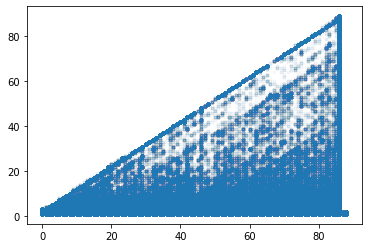

In [194]:

plt.scatter(np.array(lifetimes)[:, 0],np.array(lifetimes)[:, -1], marker='.', alpha=0.01)

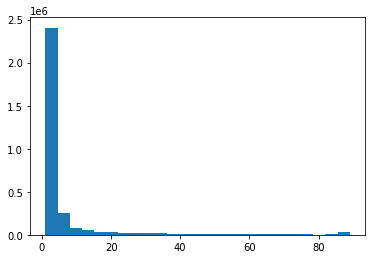

In [155]:
# plt.hist(np.array(lifetimes).T[-1], bins=100)

# plt.subplot(211)
# hist, bins, _ = plt.hist(np.array(lifetimes).T[-1], bins=90)

# logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
# plt.subplot(212)
plt.hist(np.array(lifetimes).T[-1], bins=25)
# plt.yscale('log')
plt.show()

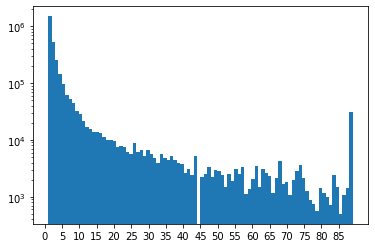

In [159]:
plt.hist(np.array(lifetimes).T[-1], bins=90)
plt.yscale('log')
plt.xticks(range(0,90,5))
plt.show()

In [174]:
test = np.array(lifetimes).T[-1]
test = test[test > 4]
len(test)

696259

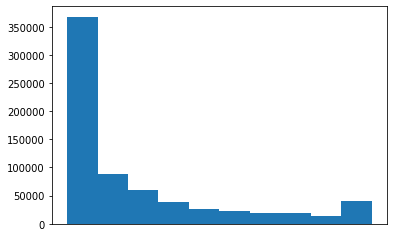

In [175]:
plt.hist(test)
# plt.yscale('log')
plt.xticks(range(100,90,5))
plt.show()

In [141]:
len(np.array(lifetimes).T[-1])

3102012

(array([115448.,  62885.,  44935.,  32535.,  20894.,  20015.,  17572.,
         16991.,  11772.,  38950.]),
 array([11. , 18.8, 26.6, 34.4, 42.2, 50. , 57.8, 65.6, 73.4, 81.2, 89. ]),
 <BarContainer object of 10 artists>)

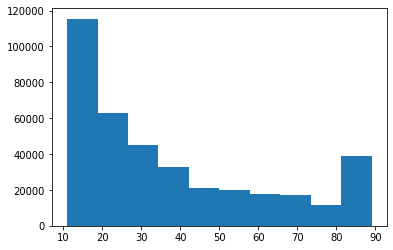

In [149]:
plt.hist(test)

In [135]:
test.dtype

dtype('int64')